# Project 1: Bitcoin Market Rate Prediction

# Context

Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. Below is the data of Bitcoin Market Price.

# Data Description

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('bitcoin_dataset.csv')


In [4]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

# Data Preprocessing

Data Cleaning : Finding number of missing values for input features and imputing missing values.

In [6]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

There are missing values in certain variables and they are handled using below technique.

In [7]:
data.fillna(method='ffill', inplace=True)

Replacing NaNs by preceding values in Dataset using Forward fill technique. replacing NaNs with mean and median of a feature column may not produce good results since it is a time-series data.

In [8]:
data.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2906 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2906 non-null float64
btc_blocks_size                                        2906 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2906 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

# Feature Selection

The least significant variables are analyzed using the variable worth plot and removed for further processing using the ‘Drop’  command for the respective variables. Correlation matrix is analyzed to understand the significance among variables and relationship with the output movie rating variable.

Below table shows descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [10]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.146370e+07,1.344255e+10,7.353275e+07,35156.964795,0.350366,0.364074,671.673651,7.529704,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.209966e+06,3.866150e+10,2.914134e+08,43539.100578,0.353168,0.842259,689.561322,4.984088,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.334900e+06,5.363081e+07,2.968431e+05,750.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.237281e+07,3.346869e+09,9.983375e+06,14664.500000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.517080e+07,8.075525e+09,2.829294e+07,57426.500000,0.676065,0.000000,1232.995223,10.245833,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


# Correlation Matrix

Plotting Correlation Matrix showing correlation coeeficients between sets of varibles and target variable.

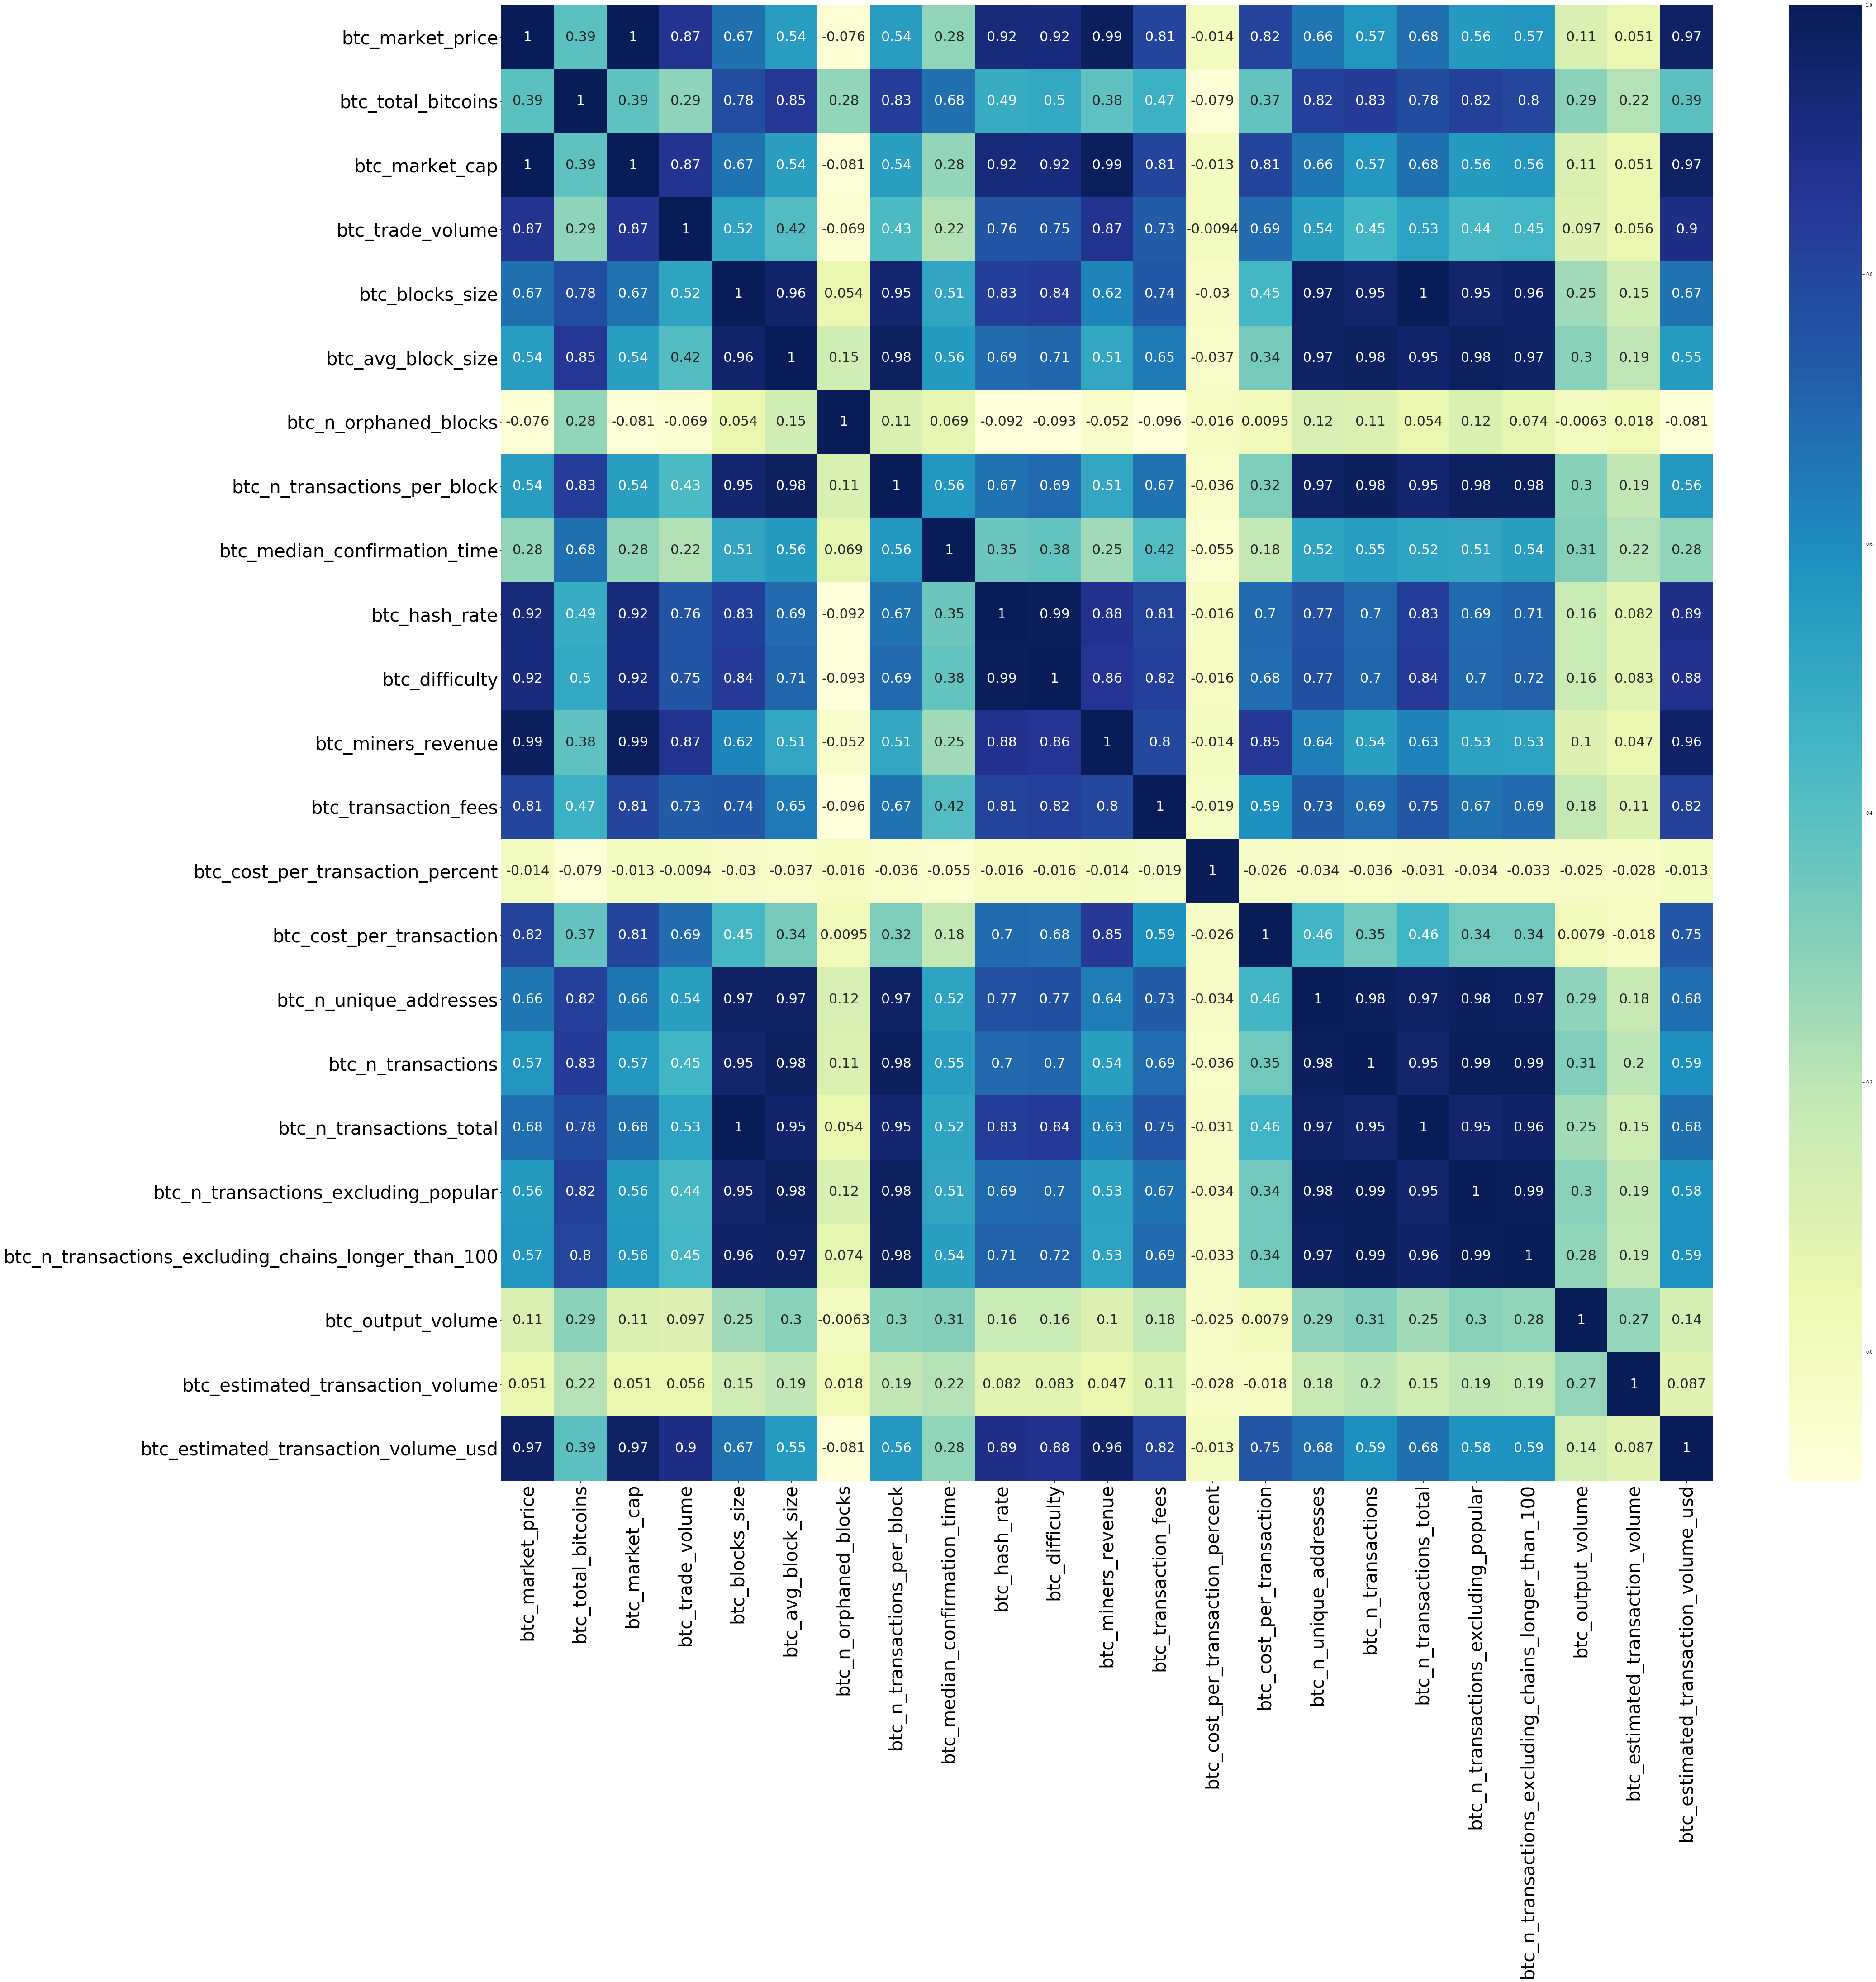

In [11]:
correlation = data.corr()
fig, ax = plt.subplots(figsize=(60, 60))
ax.tick_params(labelsize=40)
sns.heatmap(correlation, annot=True,annot_kws={"size": 30},cmap='YlGnBu')
plt.show()

As per the Correlation Matrix, btc_market_cap is strongly correlated with target variable(btc_market_price). 
Btc market cap is a redundant variable. It is a total market value of all bitcoins.
Btc market cap = (Btc market price) * (total Bitcoins). All features strongly correlated with target variable needs to be removed from the model analysis.
Hence dropping Btc_market_cap, Btc_estimated_tranasction_volume_usd and Btc_miners_revenue 

In [12]:
data.drop(['btc_miners_revenue'],axis=1,inplace= True)
data.drop(['btc_estimated_transaction_volume_usd'],axis=1,inplace= True)
data.drop(['btc_market_cap'],axis=1,inplace= True)


Generating Input feature and Target Variable as X and Y variable.

In [13]:
X = data.iloc[:,2:]
Y = data['btc_market_price']


# Variable Importance Plot

Variable importance plot provides a list of the most significant variables in descending order by a mean decrease. The top variables contribute more to the model than the bottom ones and also have high predictive power in predicting Bitcoin Market Price.

In [14]:
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, Y)
print(model.feature_importances_)

Sr = pd.Series(model.feature_importances_,index = X.columns)
#Sr.sort_values(inplace = True)
print(Sr)

[  2.90111089e-02   1.40791404e-02   1.32852821e-01   2.39141012e-04
   1.61962175e-05   8.59723070e-04   2.03201287e-04   2.73616657e-01
   2.83993905e-01   5.41569577e-03   4.85781867e-04   6.81809053e-02
   2.12865827e-03   2.49592951e-04   1.82400165e-01   3.66159866e-03
   1.78510243e-03   7.38976846e-04   8.16284267e-05]
btc_total_bitcoins                                     0.029011
btc_trade_volume                                       0.014079
btc_blocks_size                                        0.132853
btc_avg_block_size                                     0.000239
btc_n_orphaned_blocks                                  0.000016
btc_n_transactions_per_block                           0.000860
btc_median_confirmation_time                           0.000203
btc_hash_rate                                          0.273617
btc_difficulty                                         0.283994
btc_transaction_fees                                   0.005416
btc_cost_per_transaction_percen

In [15]:
Sr.sort_values(inplace = True)
print(Sr)

btc_n_orphaned_blocks                                  0.000016
btc_estimated_transaction_volume                       0.000082
btc_median_confirmation_time                           0.000203
btc_avg_block_size                                     0.000239
btc_n_transactions                                     0.000250
btc_cost_per_transaction_percent                       0.000486
btc_output_volume                                      0.000739
btc_n_transactions_per_block                           0.000860
btc_n_transactions_excluding_chains_longer_than_100    0.001785
btc_n_unique_addresses                                 0.002129
btc_n_transactions_excluding_popular                   0.003662
btc_transaction_fees                                   0.005416
btc_trade_volume                                       0.014079
btc_total_bitcoins                                     0.029011
btc_cost_per_transaction                               0.068181
btc_blocks_size                         

In [16]:
X_feature_extracted = X[['btc_difficulty','btc_hash_rate','btc_n_transactions_total','btc_blocks_size','btc_cost_per_transaction','btc_trade_volume']]

From the above Variable Importance plot, We are selecrting top 6 features for builing models.

# Pre Analysis

Btc market Price V/s Btc Difficulty

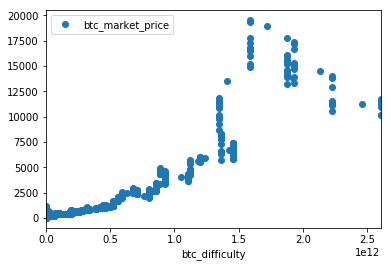

In [17]:
data.plot(x='btc_difficulty', y='btc_market_price', style='o')
plt.show()

From the graph above, we dont have linear relationship between these two variables.

Btc Market Price V/s Btc Hash rate

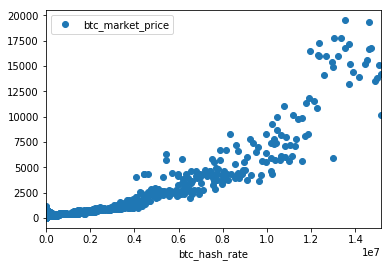

In [18]:
data.plot(x='btc_hash_rate', y='btc_market_price', style='o')
plt.show()

Hash Rate is the speed at which a compute is completing an operation in the Bitcoin code. A higher hash rate is better when mining as it increases your opportunity of finding the next block and receiving the reward. From the graph above, we can say that as Hash rate increases bitcoin price also increases.

Btc Market Price V/s Btc Blocks Size

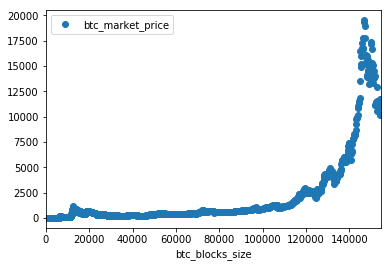

In [19]:
data.plot(x='btc_blocks_size', y='btc_market_price', style='o')
plt.show()

Bitcoin transactions are collected in blocks and processed by bitcoin miners. The data related to each transaction takes up space in a block. As from the graph above, as Block size increases, rate also increases. But we also observe from the graph after certain point, market price started decreasing. So there may be some other factors which caused rate to go down after certain point.

Btc Market Price V/s Btc Trade Volume

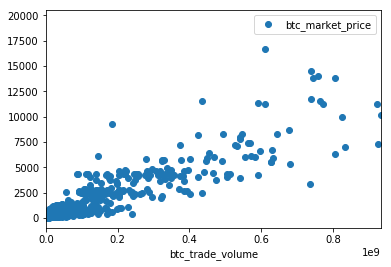

In [21]:
data.plot(x='btc_trade_volume', y='btc_market_price', style='o')
plt.show()

Bitcoin trade volume is The total USD value of trading volume on major bitcoin exchanges.As from the grapg, we can observce that martket price increased as trade volume started increasing.

# Feature Extraction - Transformation

MinMax Scaling[0-1] was applied to Input variables because for certain variables range of values were marginally high compared to other variable values. By doing this we ensure that all the variables contribute equally to the analysis and optimize the prediction ratings.

In [22]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X_feature_extracted))
# summarize transformed data
numpy.set_printoptions(precision=3)
rescaledX.columns = X_feature_extracted.columns

In [23]:
rescaledX.describe()

,btc_difficulty,btc_hash_rate,btc_n_transactions_total,btc_blocks_size,btc_cost_per_transaction,btc_trade_volume
count,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2906.000000
mean,6.237047e-02,5.756985e-02,0.230591,0.227635,0.090540,0.013739
std,1.430553e-01,1.353158e-01,0.279299,0.281908,0.127012,0.054449
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.112269e-07,5.372012e-07,0.007996,0.004856,0.025707,0.000055
50%,1.007040e-03,1.007041e-03,0.109596,0.094950,0.048380,0.001865
75%,4.611191e-02,4.791184e-02,0.364153,0.371826,0.091539,0.005286
max,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000


# Evaluation Matrix Table:

In [64]:
evaluationMatrix = pd.DataFrame(np.nan, index=['linReg','knnN','ridgeReg','lassoReg','plyRidge','svrLnr','svrRbf','decTree'], columns=['R-square','RMSE'])

# Predictive Models

# K-Nearest Neighbors Regression Technique

In [24]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))
#print(knnreg.predict(X_test))
knnrg = pd.DataFrame(knnreg.predict(X_test))
knnrg.head(10)

R-squared test score: 0.991


,0
0,5.902334
1,267.034000
2,93.436520
3,442.296000
4,3.113600
5,14.384552
6,3.029996
7,2604.537162
8,799.107675
9,10.976576


Above is the Predicted Btc Market Price for the Test Data Set.

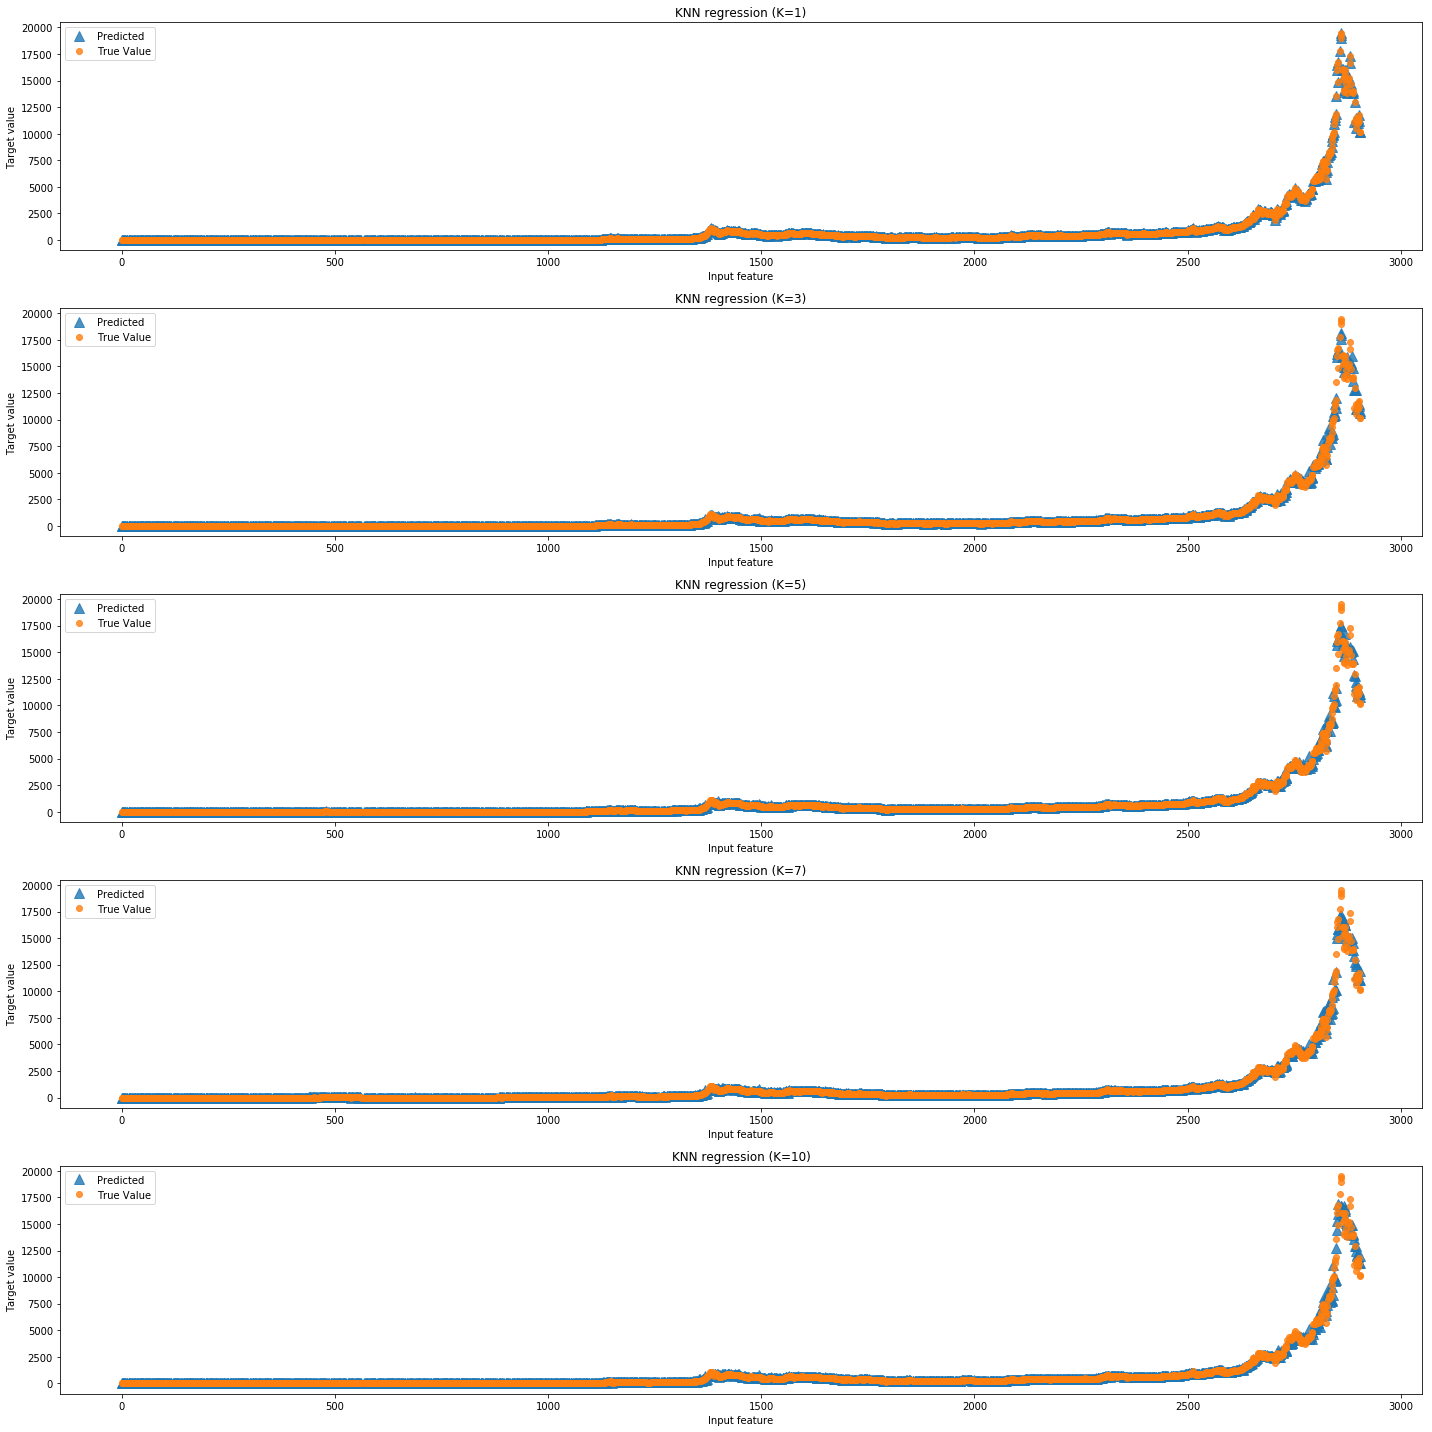

In [25]:
import matplotlib.pyplot as plt
fig, subaxes = plt.subplots(5, 1, figsize=(20,20))
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3,5,7,10]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_train)
    thisaxis.plot(X_train.index, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train.index, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state=0)


param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid_search.fit(X_train,(y_train))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 4}
Best cross-validation score: 0.99


Selecting the best value of K to get the best Cross-validation score from the Grid Search.

In [27]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)

print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))
#print(knnreg.predict(X_test))
knnrgg = pd.DataFrame(knnreg.predict(X_test))
knnrgg.head(10)

R-squared test score: 0.991


,0
0,5.951285
1,269.425000
2,92.994498
3,442.520000
4,3.107500
5,14.070000
6,3.190000
7,2553.768988
8,801.783156
9,11.076000


In [65]:
evaluationMatrix['R-square']['knnN'] = knnreg.score(X_test, y_test)
evaluationMatrix['RMSE']['knnN'] = np.mean((knnreg.predict(X_test) - y_test) ** 2)

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y,
                                                   random_state = 0)


In [35]:
linreg = LinearRegression().fit(X_train, y_train)

In [36]:
print(linreg.score(X_train, y_train))

print(linreg.score(X_test, y_test))

0.949656936996
0.943942057801


In [37]:
linregg = pd.DataFrame(linreg.predict(X_test))
linregg.head(10)


,0
0,77.073980
1,190.958120
2,-3.950834
3,298.195260
4,-12.553708
5,320.664818
6,-21.192593
7,3246.344900
8,781.636903
9,-128.339751


In [66]:
evaluationMatrix['R-square']['linReg'] = linreg.score(X_test, y_test)
evaluationMatrix['RMSE']['linReg'] = np.mean((linreg.predict(X_test) - y_test) ** 2)

# Checking the Important Variables for the model

Scikit-learn is a good way to plot a linear regression but if we are considering linear regression for modelling purposes then we need to know the importance of variables( significance) with respect to the hypothesis.

To do this, we need to calculate the p value for each variable and if it is less than the desired cutoff( 0.05 is the general cut off for 95% significance) then we can say with confidence that a variable is significant.

In [39]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model1=sm.OLS(y_train,X_train)
result = model1.fit()
print(result.summary())

C:\Users\jimit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:       btc_market_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     7756.
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        13:36:08   Log-Likelihood:                -16669.
No. Observations:                2179   AIC:                         3.335e+04
Df Residuals:                    2173   BIC:                         3.338e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
btc_difficulty          

As per the results above, All variables have P value less than 0.05, so each variable is important for the regression model analysis.

# Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Bitcoin dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Bitcoin dataset
ridge regression linear model intercept: -303.82947043115666
ridge regression linear model coeff:
[ 4030.131  3952.334   520.599   481.247  4315.709  2788.7  ]
R-squared score (training): 0.888
R-squared score (test): 0.878
Number of non-zero features: 6


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state=0)


param_grid = {'alpha': [0.1,1,2,5,10,20,100,200]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5)

grid_search.fit(X_train,(y_train))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.94


Selecting 'alpha' as 0.1 to get the best cross validation score for the Ridge Regression.

In [42]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y,
                                                   random_state = 0)

linridge = Ridge(alpha=0.1).fit(X_train, y_train)

print('Bitcoin dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Bitcoin dataset
ridge regression linear model intercept: -115.3692274861362
ridge regression linear model coeff:
[  4720.864   6232.098  -4024.604   3052.541   4238.234  10955.467]
R-squared score (training): 0.949
R-squared score (test): 0.943
Number of non-zero features: 6


In [67]:
evaluationMatrix['R-square']['ridgeReg'] = linridge.score(X_test, y_test)
evaluationMatrix['RMSE']['ridgeReg'] = np.mean((linridge.predict(X_test) - y_test) ** 2)

# Lasso Regression

In [44]:
from sklearn.linear_model import Lasso


linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(rescaledX, Y)

print('Bitcoin DataSet')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(rescaledX, Y)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(rescaledX, Y)))
print('Features with non-zero weight (sorted by absolute magnitude):')

Bitcoin DataSet
lasso regression linear model intercept: -154.01847262187982
lasso regression linear model coeff:
[  5340.667   5101.198   -739.417     -0.      4249.18   11072.508]
Non-zero features: 5
R-squared score (training): 0.947
R-squared score (test): 0.947

Features with non-zero weight (sorted by absolute magnitude):


In [45]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')


for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(rescaledX, Y)
    r2_train = linlasso.score(X_train,y_train)
    r2_test = linlasso.score(X_test,y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 5, r-squared training: 0.95, r-squared test: 0.94

Alpha = 1.00
Features kept: 5, r-squared training: 0.95, r-squared test: 0.94

Alpha = 2.00
Features kept: 5, r-squared training: 0.95, r-squared test: 0.94

Alpha = 3.00
Features kept: 5, r-squared training: 0.95, r-squared test: 0.94

Alpha = 5.00
Features kept: 5, r-squared training: 0.95, r-squared test: 0.94

Alpha = 10.00
Features kept: 4, r-squared training: 0.94, r-squared test: 0.93

Alpha = 20.00
Features kept: 4, r-squared training: 0.91, r-squared test: 0.91

Alpha = 50.00
Features kept: 3, r-squared training: 0.88, r-squared test: 0.87



In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state=0)


param_grid = {'alpha': [1,2,3,5,10,20,100,200]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5)

grid_search.fit(X_train,(y_train))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.94


Selecting 'alpha' as 0.1 to get the best cross validation score for the Ridge Regression.

In [48]:
from sklearn.linear_model import Lasso


linlasso = Lasso(alpha=1, max_iter = 10000).fit(rescaledX, Y)

print('Bitcoin DataSet')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

Bitcoin DataSet
lasso regression linear model intercept: -139.05632284234298
lasso regression linear model coeff:
[  5402.946   5147.906   -833.798     -0.      4176.102  11570.681]
Non-zero features: 5
R-squared score (training): 0.948
R-squared score (test): 0.944

Features with non-zero weight (sorted by absolute magnitude):


In [68]:
evaluationMatrix['R-square']['lassoReg'] = linlasso.score(X_test, y_test)
evaluationMatrix['RMSE']['lassoReg'] = np.mean((linlasso.predict(X_test) - y_test) ** 2)

# Polynomial Regression

In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(rescaledX)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, Y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, Y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [  4201.791   5701.53  -17550.821  16633.753   4564.522  13120.133]
linear model intercept (b): -80.810
R-squared score (training): 0.949
R-squared score (test): 0.945

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ -1.150e-06   6.946e+03  -2.333e+04   9.884e+03  -8.071e+03  -4.265e+02
  -1.893e+04   1.245e+04   1.820e+04   3.657e+05  -3.734e+05  -4.895e+04
  -5.712e+04  -3.195e+04  -3.496e+05   3.821e+05   4.032e+04   1.297e+03
  -1.343e+06   2.567e+06   1.961e+05   9.585e+05  -1.226e+06  -1.759e+05
  -9.096e+05  -5.116e+03   3.109e+04  -7.360e+03]
(poly deg 2) linear model intercept (b): -4.164
(poly deg 2) R-squared score (training): 0.989
(poly deg 2) R-squared score (test): 0.972


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(

In [69]:
evaluationMatrix['R-square']['plyRidge'] = linreg.score(X_test, y_test)
evaluationMatrix['RMSE']['plyRidge'] = np.mean((linreg.predict(X_test) - y_test) ** 2)

# Support Vector Regression

Kernel 'RBF' type.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y)

from sklearn.svm import SVR

svr = SVR(kernel = 'rbf',C=1e2, epsilon = 0.01, gamma=1)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.8091598841369565

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state=0)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'gamma': 1}
Best cross-validation score: 0.98


Selecting the best value of C and Gamma from the Grid search result to get the best cross-validation score.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y)

from sklearn.svm import SVR

svr = SVR(kernel = 'rbf',C=1e3, epsilon = 0.01, gamma=1)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.98080892848663681

In [72]:
evaluationMatrix['R-square']['svrRbf'] = svr.score(X_test, y_test)
evaluationMatrix['RMSE']['svrRbf'] = np.mean((svr.predict(X_test) - y_test) ** 2)

Kernel 'Linear' type.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y)

from sklearn.svm import SVR

svr = SVR(kernel = 'linear',C=1e2, epsilon = 0.01)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.78182953282951617

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state=0)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'gamma': 0.001}
Best cross-validation score: 0.91


Selecting the best value of C and Gamma from the Grid search result to get the best cross-validation score.

In [74]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear',C=1e3, epsilon = 0.01, gamma=0.001)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.91301976301496446

In [75]:
evaluationMatrix['R-square']['svrLnr'] = svr.score(X_test, y_test)
evaluationMatrix['RMSE']['svrLnr'] = np.mean((svr.predict(X_test) - y_test) ** 2)

# Descision Tree Regressor

In [76]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, random_state = 3)
clf = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.98


In [77]:
evaluationMatrix['R-square']['decTree'] = clf.score(X_test, y_test)
evaluationMatrix['RMSE']['decTree'] = np.mean((clf.predict(X_test) - y_test) ** 2)

# Evaluation

In [78]:
evaluationMatrix

,R-square,RMSE
linReg,0.936477,321597.225275
knnN,0.992560,37668.268529
ridgeReg,0.935655,325754.744510
lassoReg,0.933373,337311.361921
plyRidge,0.936477,321597.225275
svrLnr,0.913020,492772.304747
svrRbf,0.980809,99484.164646
decTree,0.983079,85665.399351


After evaluating all the classifiers, KNeighborsRegressor Produces the best result. As R2 value for the model witghh K=4 is 0.991.
It means 99.1% variance can be expalined by the model.
Also, Root-Mean Square Error for KnnN is the least comapred to all other models.

Scoring Test Data to Predict the Bitcoin Market Price.

In [79]:
test = pd.read_csv('test_set.csv')
test.head(20)

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.32070,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.21920,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.02440,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.21400,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.29930,1.758323e+09
5,2/6/2018 0:00,16850425.0,1.295060e+11,3.094258e+09,155504.2500,1.067524,0,1436.000000,7.433333,24293141.32,...,0.800015,72.073119,589896,244120,298011427,238351,164738,1.914333e+06,286153.34030,2.199270e+09
6,2/7/2018 0:00,16852187.5,1.365020e+11,1.670288e+09,155655.3629,1.071722,0,1515.737589,8.866667,20149017.21,...,0.905838,71.480272,489402,213719,298225146,205988,144287,1.160112e+06,208207.33170,1.686471e+09
7,2/8/2018 0:00,16853825.0,1.388850e+11,1.336662e+09,155792.6909,1.048305,0,1322.816794,13.675000,18720008.90,...,0.805963,82.053232,398607,173289,298398435,166517,126556,1.171510e+06,214089.82690,1.764215e+09
8,2/9/2018 0:00,16855512.5,1.438710e+11,1.093135e+09,155937.9769,1.076193,0,1317.481481,12.200000,19291612.22,...,0.890279,85.223878,462086,177860,298576295,173698,131499,1.144163e+06,199472.83090,1.702604e+09
9,2/10/2018 0:00,16857300.0,1.402510e+11,9.185402e+08,156085.9522,1.034792,0,1271.209790,9.450000,20434818.87,...,1.614559,85.874632,421547,181783,298758078,177603,133091,1.537986e+06,116211.04860,9.668616e+08


In [80]:
test_extr = test[['btc_difficulty','btc_hash_rate','btc_n_transactions_total','btc_blocks_size','btc_cost_per_transaction','btc_trade_volume']]

In [81]:
test_score = pd.DataFrame(knnreg.predict(test_extr))


In [82]:
test_score

,0
0,11033.060418
1,11033.060418
2,11033.060418
3,11033.060418
4,11033.060418
5,11111.090835
6,10700.916668
7,11033.060418
8,11033.060418
9,11033.060418


### Above are the predicted Bitcoin values from Feb 1, 2018 to Feb 14, 2018 